Predicted activity concentrations of Th (Bq/kg):
0     9.338
1    10.962
2    12.586
dtype: float64
Predicted activity concentrations of U (Bq/kg):
0    45.695
1    46.930
2    50.635
dtype: float64
Predicted activity concentrations of K (Bq/kg):
0    513.4
1    604.0
2    573.8
dtype: float64
Air absorbed gamma dose rate (nGy/h):
0    37.2384
1    42.4274
2    43.0368
dtype: float64
Airborne gamma dose rate is within limits.
eval_env: 1


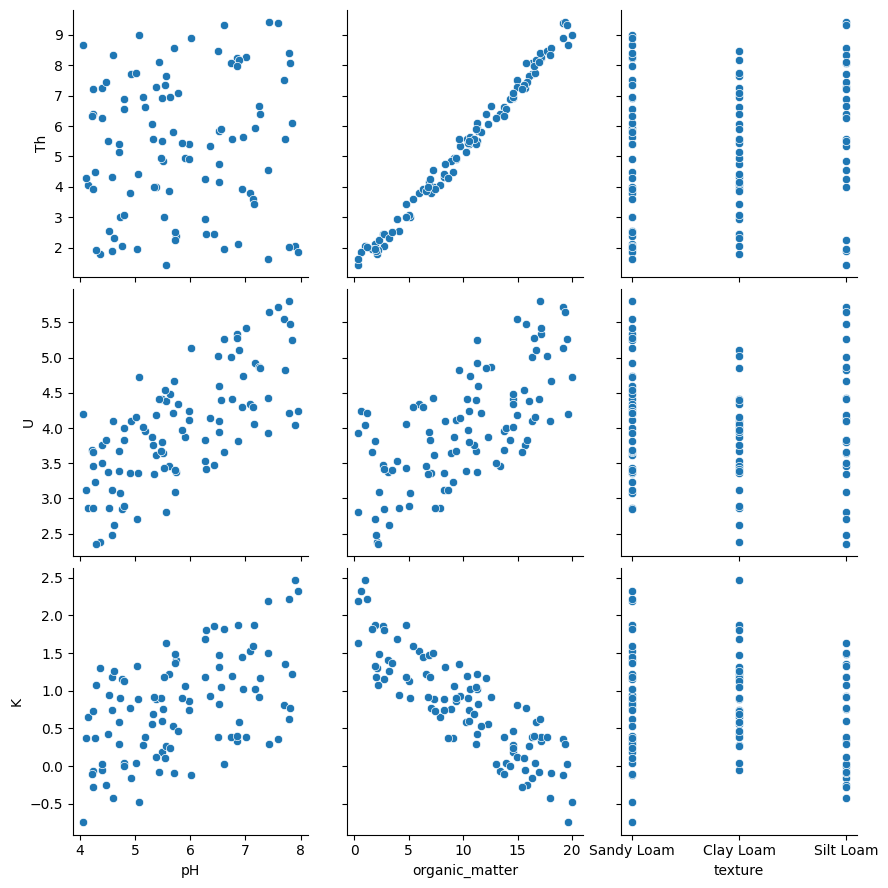

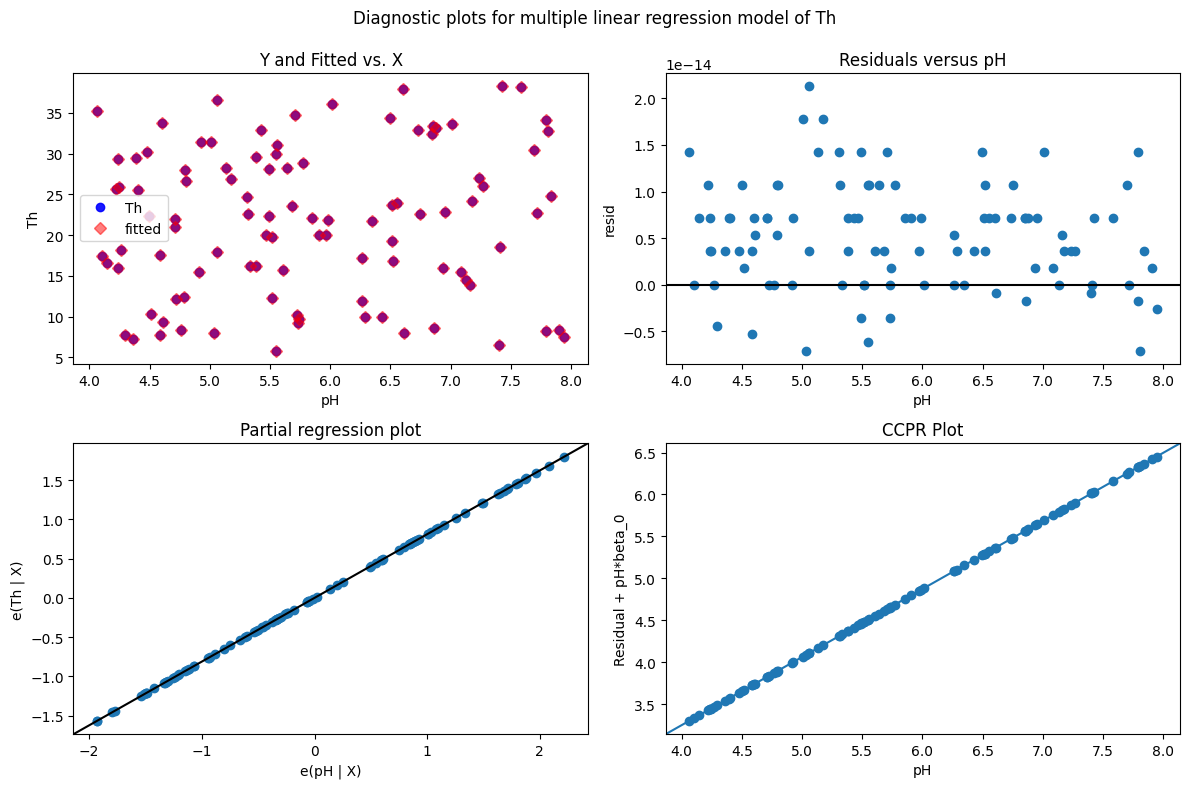

eval_env: 1


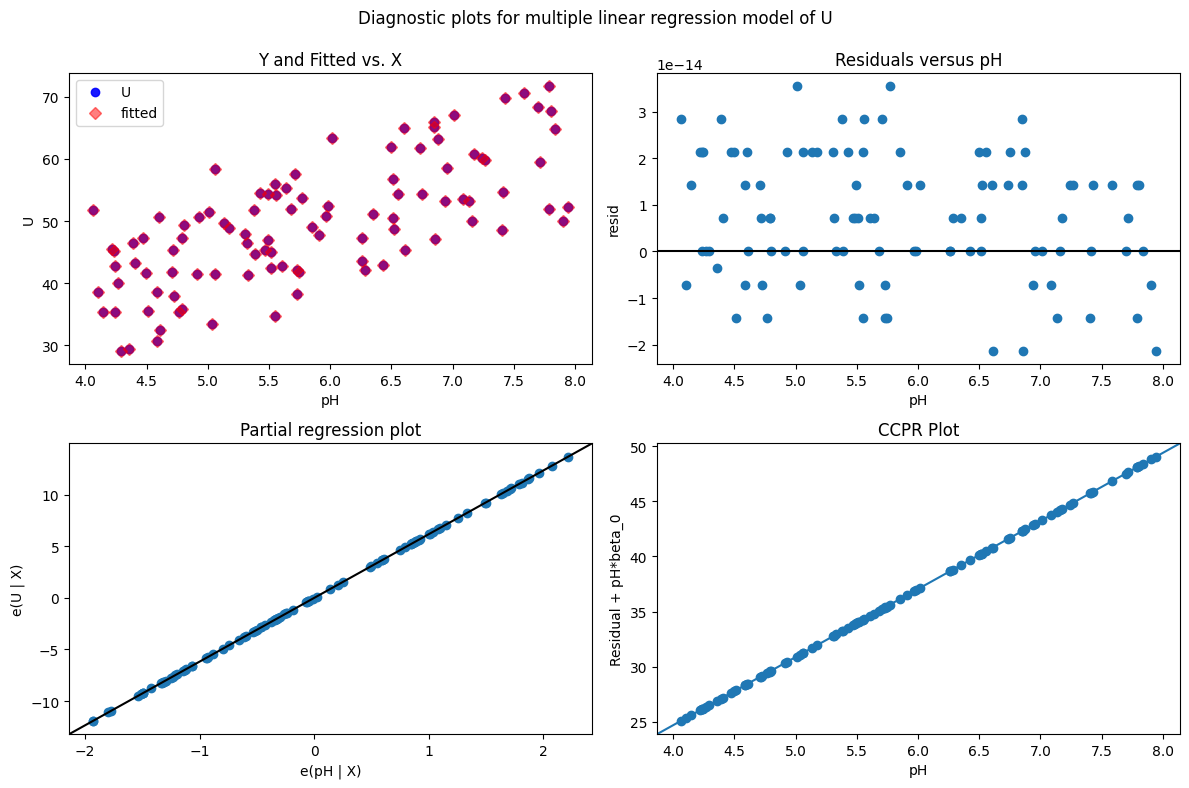

eval_env: 1


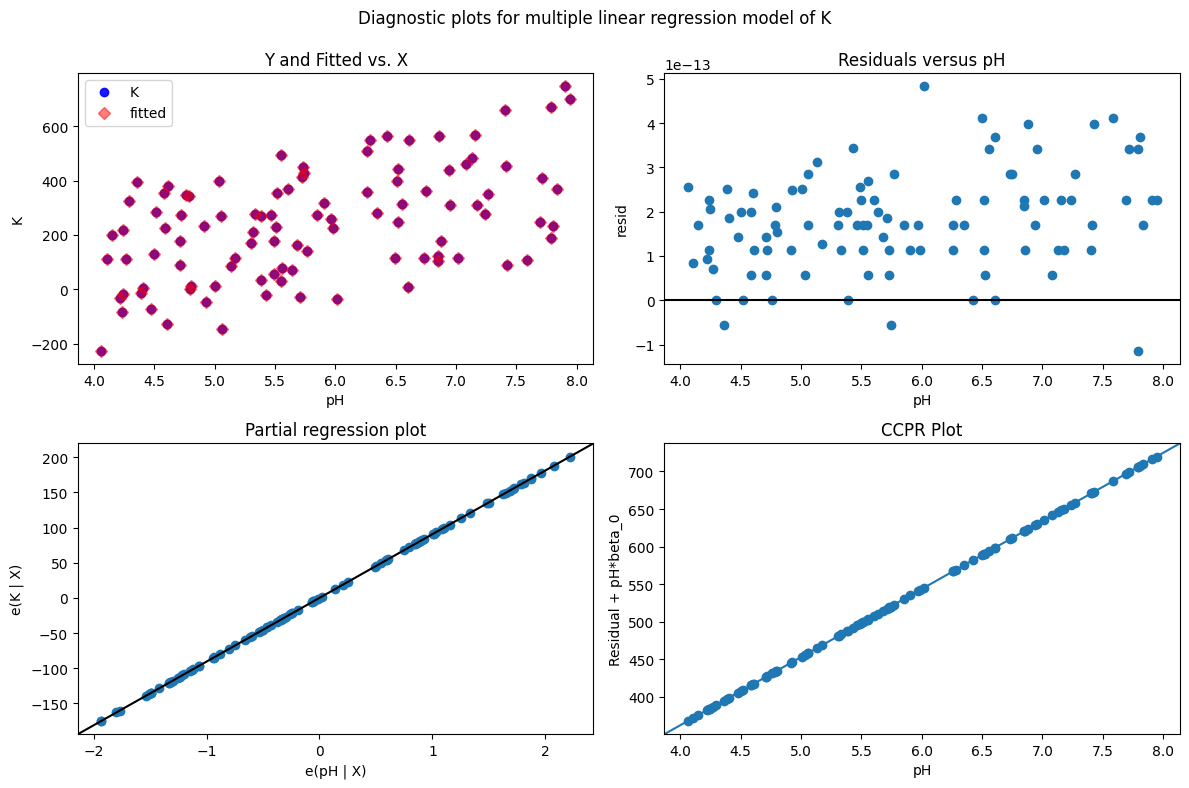

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the survey data into a pandas dataframe
survey_data = pd.read_csv('./synthetic_survey_data.csv')

# Define the predictor variables and the response variables
X = survey_data[['pH', 'organic_matter', 'texture']]
y_th = survey_data['Th']*4.06
y_u = survey_data['U']*12.35
y_k = survey_data['K']*302 #these numbers are conversions factors from ppm to bq per kg

# Convert the 'texture' column to categorical variables
X = pd.get_dummies(X, columns=['texture'])

# Fit multiple linear regression models to predict Th, U, and K based on pH, organic matter, and texture
model_th = sm.OLS(y_th, X).fit()
model_u = sm.OLS(y_u, X).fit()
model_k = sm.OLS(y_k, X).fit()

# Use the models to predict the concentrations of Th, U, and K in unsampled areas
new_data = pd.DataFrame({'pH': [6.5, 7.0, 7.5],
                         'organic_matter': [2.5, 3.0, 3.5],
                         'texture_Cl': [0, 1, 0],
                         'texture_Sandy Loam': [1, 0, 0],
                         'texture_Silt Loam': [0, 0, 1]})
predictions_th = model_th.predict(new_data)
predictions_u = model_u.predict(new_data)
predictions_k = model_k.predict(new_data)

# Calculate the air absorbed gamma dose rate in nGy/h using the conversion factors
# For Th: 1 Bq/kg = 0.7 nGy/h
# For U: 1 Bq/kg = 0.2 nGy/h
# For K: 1 Bq/kg = 0.042 nGy/h
gamma_dose_rate = predictions_th*0.7 + predictions_u*0.2 + predictions_k*0.042

# Output the predicted concentrations of Th, U, and K and the air absorbed gamma dose rate
print('Predicted activity concentrations of Th (Bq/kg):')
print(predictions_th)
print('Predicted activity concentrations of U (Bq/kg):')
print(predictions_u)
print('Predicted activity concentrations of K (Bq/kg):')
print(predictions_k)
print('Air absorbed gamma dose rate (nGy/h):')
print(gamma_dose_rate)
if gamma_dose_rate.max() <= 1/0.0126:
    print('Airborne gamma dose rate is within limits.')
else:
    print('Airborne gamma dose rate is above the limit of 1 microsievert per hour.')



# Scatter plots of predictor variables against response variables
sns.pairplot(survey_data, x_vars=['pH', 'organic_matter', 'texture'], y_vars=['Th', 'U', 'K'], height=3)

# Generate diagnostic plots for the Th model
fig_Th = sm.graphics.plot_regress_exog(model_th, 'pH', fig=plt.figure(figsize=(12, 8)))
fig_Th.suptitle('Diagnostic plots for multiple linear regression model of Th')
plt.show()
# Generate diagnostic plots for model_u
fig_u = sm.graphics.plot_regress_exog(model_u, 'pH', fig=plt.figure(figsize=(12, 8)))
fig_u.suptitle('Diagnostic plots for multiple linear regression model of U')
plt.show()

# Generate diagnostic plots for model_k
fig_k = sm.graphics.plot_regress_exog(model_k, 'pH', fig=plt.figure(figsize=(12, 8)))
fig_k.suptitle('Diagnostic plots for multiple linear regression model of K')
plt.show()
